# Microchip

#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result
10> save Model
11> reload model for prediction of test .csv
12>do data cleaning for test.csv
13> predict Fees

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Data file.csv')

In [5]:
data

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [6]:
data.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

As there is a difference between min and mox one need to do is scaling of data

In some attributes there is huge difference present between std and mean, skewness will be present and needto handle it

In [7]:
data.shape

(209593, 37)

number of entries = 209593 and number of columns = 37

In [8]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

msisdn,pcircle,pdate this 3 are of object type                    

There is mixed type of datatypes so one do use is encoder

In [9]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
data=data[['Unnamed: 0', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate','label']]

In [11]:
data.columns

Index(['Unnamed: 0', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate', 'label'],
      dtype='object')

In [12]:
data

Unnamed: 0       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0                1  21408I70789   272.0   3055.050000   3065.150000    220.13   
1                2  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2                3  17943I70372   535.0   1398.000000   1398.000000    900.13   
3                4  55773I70781   241.0     21.228000     21.228000    159.42   
4                5  03813I82730   947.0    150.619333    150.619333   1098.90   
...            ...          ...     ...           ...           ...       ...   
209588      209589  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      209590  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      209591  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      209592  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      209593  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  pcircle       pdate  label  
0                      0.0  29.000000  29.000000      UPW  2016-07-20      0  
1                      0.0   0.000000   0.000000      UPW  2016-08-10      1  
2                      0.0   0.000000   0.000000      UPW  2016-08-19      1  
3                      0.0   0.000000   0.000000      UPW  2016-06-06      1  
4                      0.0   2.333333   2.333333      UPW  2016-06-22      1  
...                    ...        ...        ...      ...         ...    ...  
209588                 0.0   1.000000   1.000000      UPW  2016-06-17      1  
209589                 0.0   1.000000   1.000000      UPW  2016-06-12      1  
209590                 0.0   4.000000   3.833333      UPW  2016-07-29      1  
209591                 0.0   0.000000  10.500000      UPW  2016-07-25      1  
209592                 0.0   0.000000   0.000000      UPW  2016-07-07      1  

[209593 rows x 37 columns]

In [13]:
print("Number of Categories: ")
for ColName in data[['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories: 
Unnamed: 0 = 209593
label = 2
msisdn = 186243
aon = 4507
daily_decr30 = 147025
daily_decr90 = 158669
rental30 = 132148
rental90 = 141033
last_rech_date_ma = 1186
last_rech_date_da = 1174
last_rech_amt_ma = 70
cnt_ma_rech30 = 71
fr_ma_rech30 = 1083
sumamnt_ma_rech30 = 15141
medianamnt_ma_rech30 = 510
medianmarechprebal30 = 30428
cnt_ma_rech90 = 110
fr_ma_rech90 = 89
sumamnt_ma_rech90 = 31771
medianamnt_ma_rech90 = 608
medianmarechprebal90 = 29785
cnt_da_rech30 = 1066
fr_da_rech30 = 1072
cnt_da_rech90 = 27
fr_da_rech90 = 46
cnt_loans30 = 40
amnt_loans30 = 48
maxamnt_loans30 = 1050
medianamnt_loans30 = 6
cnt_loans90 = 1110
amnt_loans90 = 69
maxamnt_loans90 = 3
medianamnt_loans90 = 6
payback30 = 1363
payback90 = 2381
pcircle = 1
pdate = 82


Observation: This represents number of categories of particular type of data.
    As, label which is going to be target variable is having 2 types of data so one will be using Logistic Regression

## Logistic Regression Kind of technique need to resolve this problem

# EDA Process

In [14]:
data.describe()

Unnamed: 0            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000    8112.343445    5381.402289    6082.515068   
std     60504.431823   75696.082531    9220.623400   10918.812767   
min         1.000000     -48.000000     -93.012667     -93.012667   
25%     52399.000000     246.000000      42.440000      42.692000   
50%    104797.000000     527.000000    1469.175667    1500.000000   
75%    157195.000000     982.000000    7244.000000    7802.790000   
max    209593.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...   amnt_loans30  maxamnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000    209593.000000   
mean        2064.452797       3.978057  ...      17.952021       274.658747   
std         2370.786034       4.256090  ...      17.379741      4245.264648   
min            0.000000       0.000000  ...       0.000000         0.000000   
25%          770.000000       1.000000  ...       6.000000         6.000000   
50%         1539.000000       3.000000  ...      12.000000         6.000000   
75%         2309.000000       5.000000  ...      24.000000         6.000000   
max        55000.000000     203.000000  ...     306.000000     99864.560864   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       209593.000000  209593.000000  209593.000000    209593.000000   
mean             0.054029      18.520919      23.645398         6.703134   
std              0.218039     224.797423      26.469861         2.103864   
min              0.000000       0.000000       0.000000         0.000000   
25%              0.000000       1.000000       6.000000         6.000000   
50%              0.000000       2.000000      12.000000         6.000000   
75%              0.000000       5.000000      30.000000         6.000000   
max              3.000000    4997.517944     438.000000        12.000000   

       medianamnt_loans90      payback30      payback90          label  
count       209593.000000  209593.000000  209593.000000  209593.000000  
mean             0.046077       3.398826       4.321485       0.875177  
std              0.200692       8.813729      10.308108       0.330519  
min              0.000000       0.000000       0.000000       0.000000  
25%              0.000000       0.000000       0.000000       1.000000  
50%              0.000000       0.000000       1.666667       1.000000  
75%              0.000000       3.750000       4.500000       1.000000  
max              3.000000     171.500000     171.500000       1.000000  

[8 rows x 34 columns]

Min - Max: As there is alot of diffrence between min-max one need to do is scaling of data.

## Checking null value in dataset

In [15]:
data.isnull().sum()

Unnamed: 0              0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
label                   0
dtype: int64

There are no null values present

# Data Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [17]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [18]:
data

Unnamed: 0    msisdn     aon  daily_decr30  daily_decr90  rental30  \
0                1   40191.0   272.0   3055.050000   3065.150000    220.13   
1                2  142291.0   712.0  12122.000000  12124.750000   3691.26   
2                3   33594.0   535.0   1398.000000   1398.000000    900.13   
3                4  104157.0   241.0     21.228000     21.228000    159.42   
4                5    6910.0   947.0    150.619333    150.619333   1098.90   
...            ...       ...     ...           ...           ...       ...   
209588      209589   42866.0   404.0    151.872333    151.872333   1089.19   
209589      209590  178248.0  1075.0     36.936000     36.936000   1728.36   
209590      209591   53995.0  1013.0  11843.111667  11904.350000   5861.83   
209591      209592  111388.0  1732.0  12488.228333  12574.370000    411.83   
209592      209593  121263.0  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  pcircle  pdate  label  
0                      0.0  29.000000  29.000000      0.0   49.0      0  
1                      0.0   0.000000   0.000000      0.0   70.0      1  
2                      0.0   0.000000   0.000000      0.0   79.0      1  
3                      0.0   0.000000   0.000000      0.0    5.0      1  
4                      0.0   2.333333   2.333333      0.0   21.0      1  
...                    ...        ...        ...      ...    ...    ...  
209588                 0.0   1.000000   1.000000      0.0   16.0      1  
209589                 0.0   1.000000   1.000000      0.0   11.0      1  
209590                 0.0   4.000000   3.833333      0.0   58.0      1  
209591                 0.0   0.000000  10.500000      0.0   54.0      1  
209592                 0.0   0.000000   0.000000      0.0   36.0      1  

[209593 rows x 37 columns]

## Corelation of feature variable with the target variable

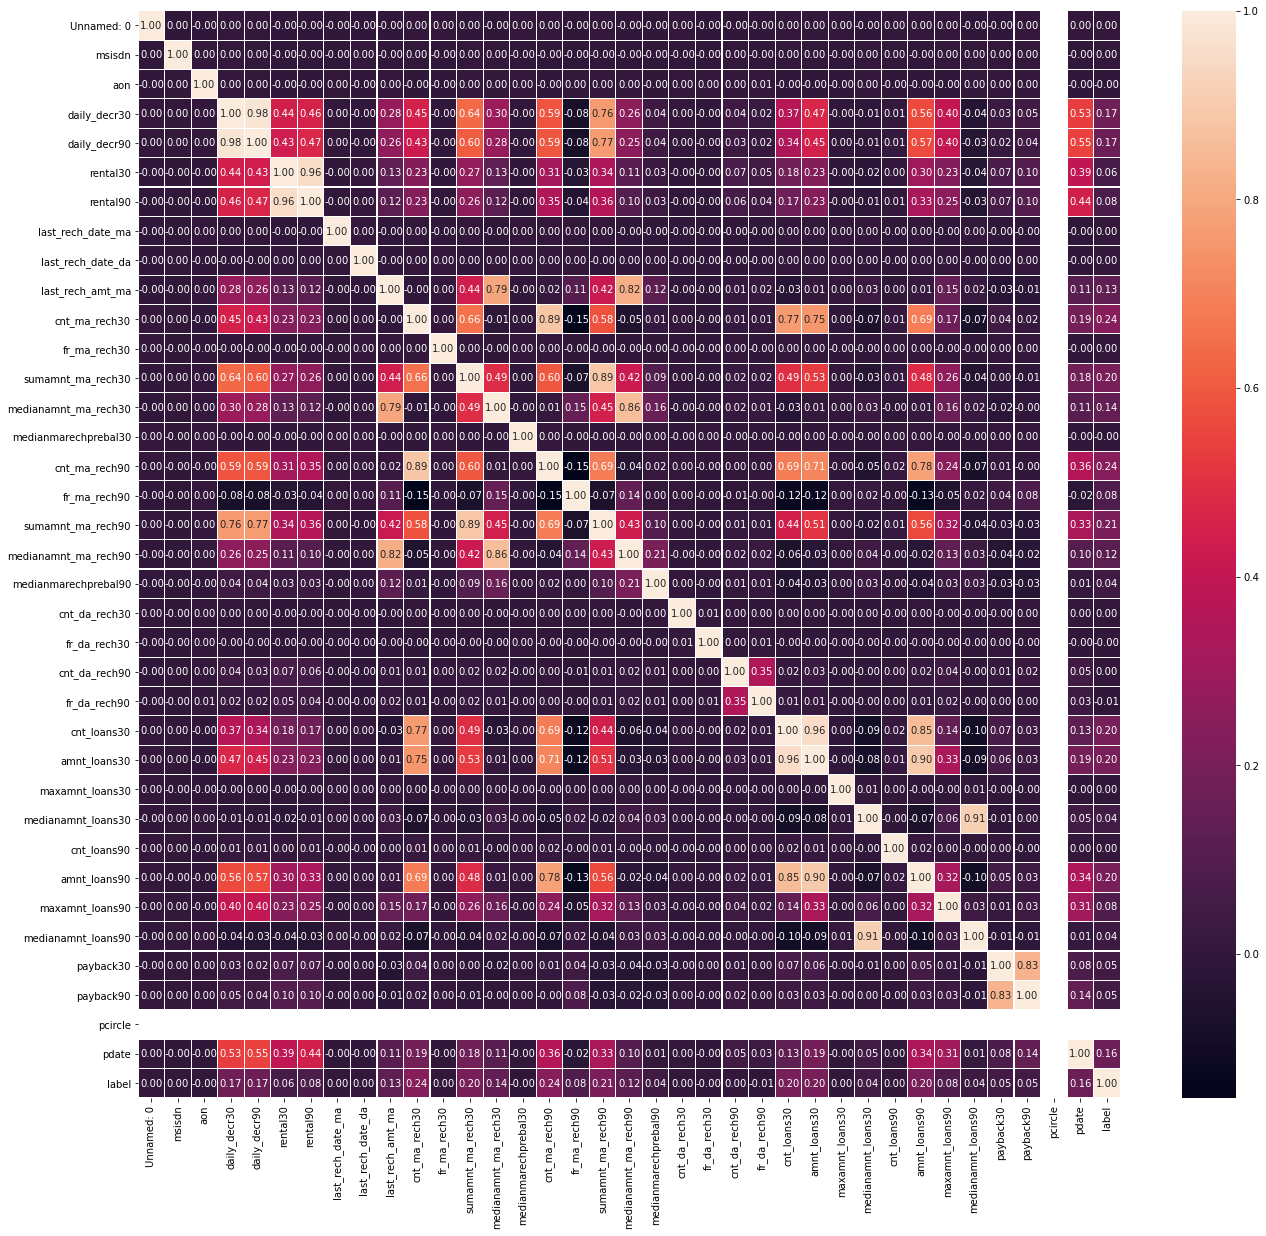

In [19]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [20]:
corr_matrix_hmap["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
pdate                   0.162687
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
msisdn                  0.001976
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0

Most highly corelated variable is : cnt_ma_rech30 ie. Number of times main account got recharged in last 30 days

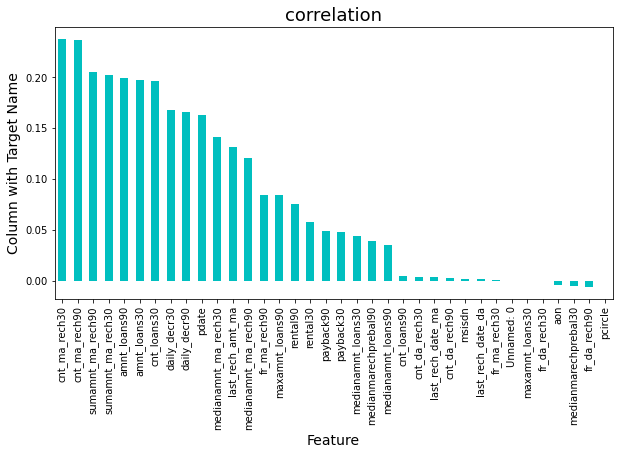

In [21]:
plt.figure(figsize=(10,5))
data.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Most highly corelated variable is : cnt_ma_rech30 ,cnt_ma_rech90
    ie. Number of times main account got recharged in last 30 daysand 90 days

# Data Cleaning

### seperating target variable and independent variable

In [22]:
# x= independent variable
x = data.iloc[:,0:-1]
x.head()

Unnamed: 0    msisdn    aon  daily_decr30  daily_decr90  rental30  \
0           1   40191.0  272.0   3055.050000   3065.150000    220.13   
1           2  142291.0  712.0  12122.000000  12124.750000   3691.26   
2           3   33594.0  535.0   1398.000000   1398.000000    900.13   
3           4  104157.0  241.0     21.228000     21.228000    159.42   
4           5    6910.0  947.0    150.619333    150.619333   1098.90   

   rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0    260.13                2.0                0.0              1539  ...   
1   3691.26               20.0                0.0              5787  ...   
2    900.13                3.0                0.0              1539  ...   
3    159.42               41.0                0.0               947  ...   
4   1098.90                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  pdate  
0                6                 0.0  29.000000  29.000000      0.0   49.0  
1               12                 0.0   0.000000   0.000000      0.0   70.0  
2                6                 0.0   0.000000   0.000000      0.0   79.0  
3                6                 0.0   0.000000   0.000000      0.0    5.0  
4                6                 0.0   2.333333   2.333333      0.0   21.0  

[5 rows x 36 columns]

In [23]:
#y = target variable = Loan_Status
y = data.iloc[:,-1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [24]:
x.shape

(209593, 36)

In [25]:
y.shape

(209593,)

## Checking Skewness

In [26]:
# skewness
x.skew()

Unnamed: 0               0.000000
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

There is skewness present. but lets handle outliers first

In [27]:
x.dtypes

Unnamed: 0                int64
msisdn                  float64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [28]:
#Method for removing skew

from sklearn.preprocessing import power_transform
z = power_transform(x[0:])
data_new= pd.DataFrame(z,columns=x.columns)

In [29]:
x = data_new

In [30]:
#recheking skewness
x.skew()

Unnamed: 0               -0.291503
msisdn                   -0.291511
aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90         

## Checking Outliers

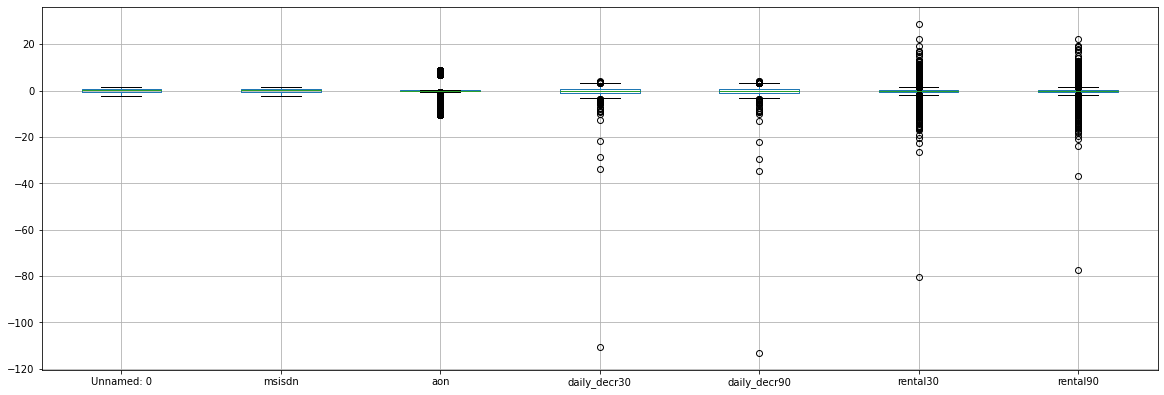

In [31]:
#checking for outliers
x.iloc[:,0:7].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

outliers is presnt in: aon, daily_decr30, daily_decr90 , mental30

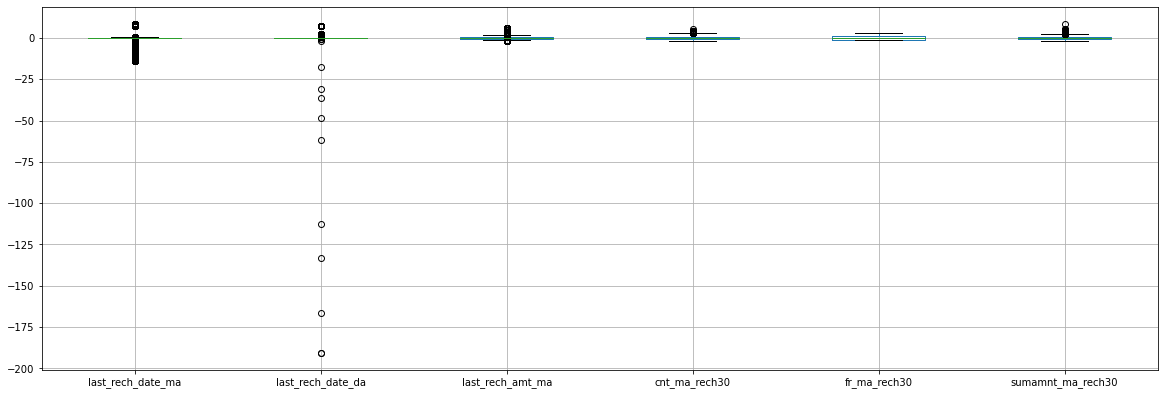

In [32]:
#checking for outliers
x.iloc[:,7:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

outliers are present in mental90, last_rech_amt_ma

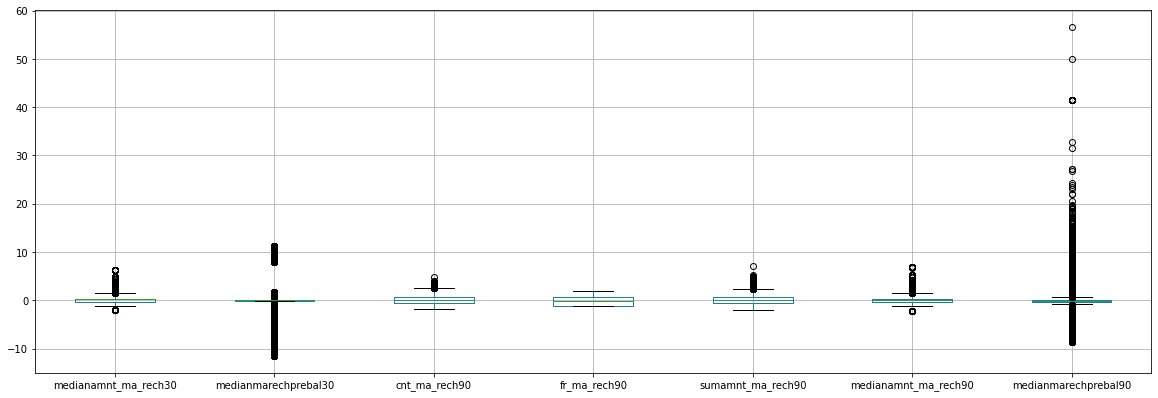

In [33]:
#checking for outliers
x.iloc[:,13:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Outliers are present in sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30,sumamnt_ma_rech90,medianmnt_ma_rech90

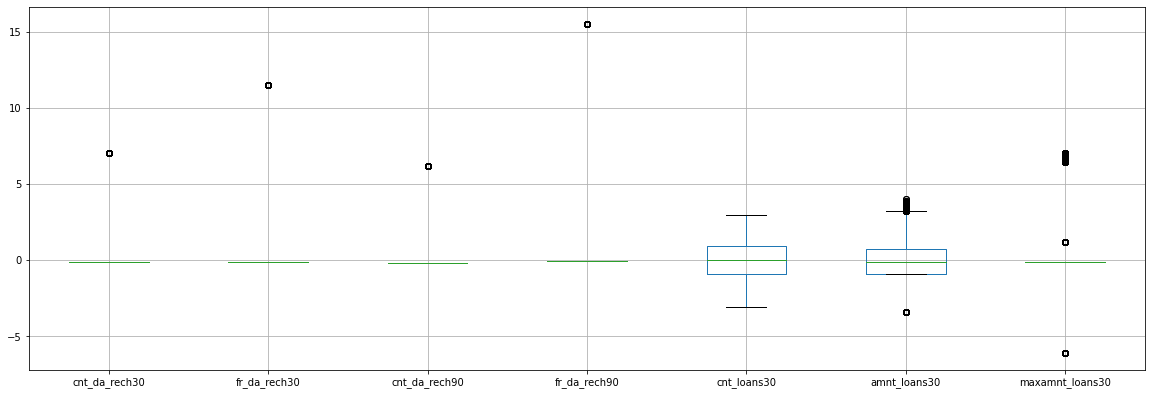

In [34]:
#checking for outliers
x.iloc[:,20:27].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Outliers are present in medianmarechprebal90,cnt_da_rech30,fr_da_reh30

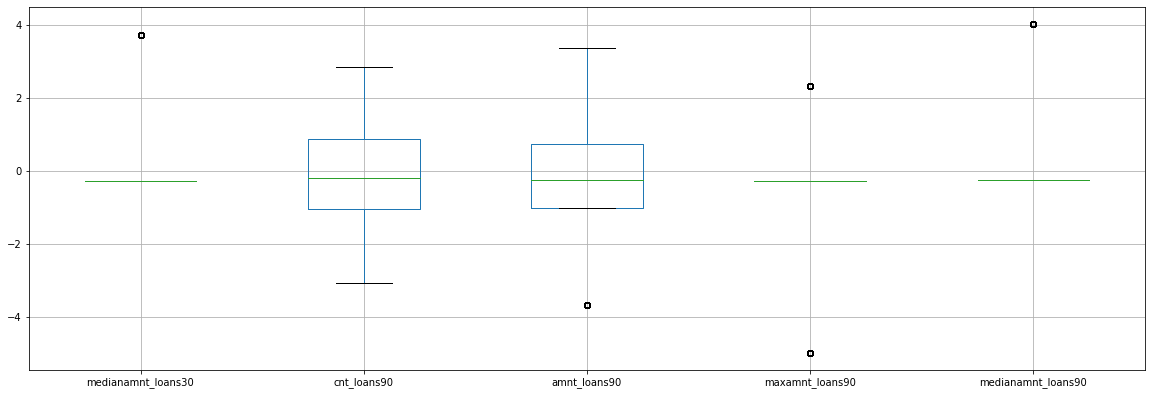

In [35]:
#checking for outliers
x.iloc[:,27:32].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

outliers are present in maxamnt_loans30, cnt_loans90

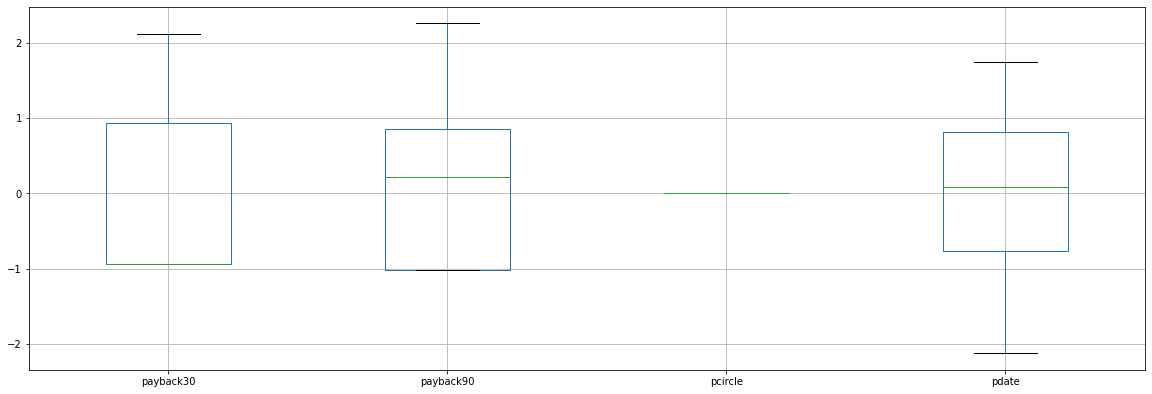

In [36]:
#checking for outliers
x.iloc[:,32:37].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

overally,outliers is presnt in: payback30, payback 90,aon, daily_decr30, daily_decr90 , mental30, mental90, last_rech_amt_ma,sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30,sumamnt_ma_rech90,medianmnt_ma_rech90, medianmarechprebal90,cnt_da_rech30,fr_da_reh30, maxamnt_loans30, cnt_loans90

## Handling of outliers


In [37]:
# # Removing Outliers
# from scipy.stats import zscore
# z= np.abs(zscore(x))
# z

In [38]:
# threshold = 3
# print(np.where(z<03))

In [39]:
# #removing outliers
# data_new = x[(z<3).all(axis=1)]

In [40]:
# x.shape

In [41]:
# #After removing outliers
# data_new.shape

In [42]:
# x=data_new
# x.shape

# Visualization

In [43]:
data.columns

Index(['Unnamed: 0', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate', 'label'],
      dtype='object')

1    183431
0     26162
Name: label, dtype: int64


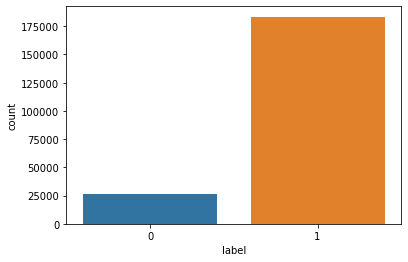

In [44]:
import seaborn as sns
alpha = sns.countplot(x="label",data=data)
print(data["label"].value_counts())

label, which is our target variable contains 2 values, 0 and 1

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

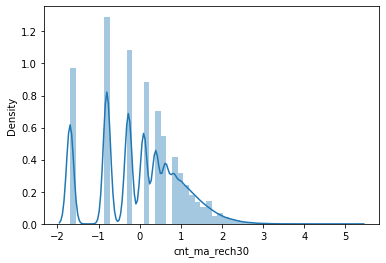

In [45]:
import seaborn as sns
sns.distplot(x['cnt_ma_rech30'],kde=True)

Overfitting and under fitting both are present in cnt_ma_rech30(Number of times main account got recharged in last 30 days)

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

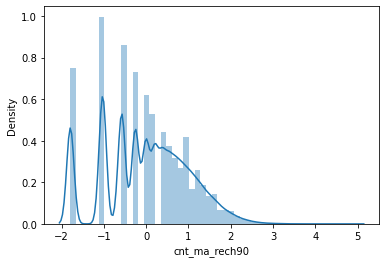

In [46]:
import seaborn as sns
sns.distplot(x['cnt_ma_rech90'],kde=True)

Here also, underfitting and overfitting both are present

In [47]:
## pairplot
# sns.pairplot(data)

Observation: In most of the variables, uderfitting and overfitting is present so need to handle that.

# Scaling

In [48]:
x.describe()

Unnamed: 0        msisdn           aon  daily_decr30  daily_decr90  \
count  2.095930e+05  2.095930e+05  2.095930e+05  2.095930e+05  2.095930e+05   
mean  -6.864320e-15  2.051804e-16  4.738284e-17 -6.296171e-17 -9.155355e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.196196e+00 -2.197085e+00 -1.048296e+01 -1.105432e+02 -1.133496e+02   
25%   -7.899115e-01 -7.906395e-01 -1.955283e-01 -9.278623e-01 -9.199392e-01   
50%    1.003556e-01  1.000115e-01 -3.821368e-02  1.217605e-02 -1.295493e-03   
75%    8.633173e-01  8.628515e-01  1.254326e-01  7.917041e-01  7.786711e-01   
max    1.553821e+00  1.554039e+00  8.704812e+00  4.218261e+00  4.218021e+00   

           rental30      rental90  last_rech_date_ma  last_rech_date_da  \
count  2.095930e+05  2.095930e+05       2.095930e+05       2.095930e+05   
mean   2.335916e-17  7.485039e-17       3.085539e-15       1.325456e-15   
std    1.000002e+00  1.000002e+00       1.000002e+00       1.000002e+00   
min   -8.030556e+01 -7.736081e+01      -1.375331e+01      -1.908910e+02   
25%   -5.595916e-01 -5.572817e-01      -5.842583e-02      -7.400703e-02   
50%   -3.147703e-01 -3.128509e-01       4.358261e-05      -7.400703e-02   
75%    2.614682e-01  2.401537e-01       7.010485e-02      -7.400703e-02   
max    2.892263e+01  2.209019e+01       8.695887e+00       7.457906e+00   

       last_rech_amt_ma  ...  maxamnt_loans30  medianamnt_loans30  \
count      2.095930e+05  ...     2.095930e+05        2.095930e+05   
mean       1.003944e-15  ...     2.268086e-15       -3.121079e-15   
std        1.000002e+00  ...     1.000002e+00        1.000002e+00   
min       -2.115772e+00  ...    -6.112711e+00       -2.690514e-01   
25%       -4.320652e-01  ...    -1.019981e-01       -2.690514e-01   
50%        8.341679e-02  ...    -1.019981e-01       -2.690514e-01   
75%        4.495501e-01  ...    -1.019981e-01       -2.690514e-01   
max        6.114559e+00  ...     7.040772e+00        3.716814e+00   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
count  2.095930e+05  2.095930e+05     2.095930e+05        2.095930e+05   
mean  -1.771814e-15  1.000233e-15     3.244557e-15        5.905966e-15   
std    1.000002e+00  1.000002e+00     1.000002e+00        1.000002e+00   
min   -3.060363e+00 -3.660585e+00    -4.992091e+00       -2.482718e-01   
25%   -1.034294e+00 -1.005714e+00    -2.856107e-01       -2.482718e-01   
50%   -1.868048e-01 -2.508502e-01    -2.856107e-01       -2.482718e-01   
75%    8.591014e-01  7.427553e-01    -2.856107e-01       -2.482718e-01   
max    2.844208e+00  3.349344e+00     2.325828e+00        4.027852e+00   

          payback30     payback90   pcircle         pdate  
count  2.095930e+05  2.095930e+05  209593.0  2.095930e+05  
mean   2.349146e-15 -1.748017e-15       0.0 -1.003612e-15  
std    1.000002e+00  1.000002e+00       0.0  1.000002e+00  
min   -9.374054e-01 -1.018917e+00       0.0 -2.123192e+00  
25%   -9.374054e-01 -1.018917e+00       0.0 -7.697819e-01  
50%   -9.374054e-01  2.135563e-01       0.0  8.292043e-02  
75%    9.359315e-01  8.537868e-01       0.0  8.106515e-01  
max    2.120943e+00  2.259043e+00       0.0  1.740520e+00  

[8 rows x 36 columns]

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [50]:
x=mms.fit_transform(x)

In [51]:
x

array([[0.00000000e+00, 3.38174205e-01, 5.37104969e-01, ...,
        8.55068646e-01, 0.00000000e+00, 6.99054776e-01],
       [9.35545296e-05, 8.26715450e-01, 5.48235224e-01, ...,
        0.00000000e+00, 0.00000000e+00, 9.01689926e-01],
       [1.78224092e-04, 2.97900564e-01, 5.44529115e-01, ...,
        0.00000000e+00, 0.00000000e+00, 9.82454713e-01],
       ...,
       [9.99993250e-01, 4.16692615e-01, 5.53349100e-01, ...,
        5.40536278e-01, 0.00000000e+00, 7.88693067e-01],
       [9.99996625e-01, 6.95305207e-01, 5.62444719e-01, ...,
        7.18967752e-01, 0.00000000e+00, 7.49435407e-01],
       [1.00000000e+00, 7.38340357e-01, 5.60774978e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.59766004e-01]])

# Model Training

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)


In [53]:
x_train.shape

(140427, 36)

In [54]:
y_train.shape

(140427,)

In [55]:
x_test.shape

(69166, 36)

In [56]:
y_test.shape

(69166,)

In [57]:
y_train

146803    1
176664    1
94427     1
170298    1
61535     1
         ..
119879    1
103694    1
131932    1
146867    1
121958    0
Name: label, Length: 140427, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [59]:
lm.fit(x_train,y_train)

LogisticRegression()

In [60]:
lm.score(x_train,y_train)

0.8765764418523503

# Predictions

In [61]:
#predict the values
pred=lm.predict(x_test)
print("Predicted Allitation",pred)
print("Actual Allitation",y_test)

Predicted Allitation [1 0 1 ... 1 1 1]
Actual Allitation 89746     1
179839    1
152209    1
88486     1
43138     1
         ..
105162    1
166079    0
182012    1
147181    0
59916     1
Name: label, Length: 69166, dtype: int64


In [62]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.8752710869502357


# Finding Best Random State

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc =accuracy_score(y_test,predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  0.8784518404996675 on Random_state 168


# Train-Test Model based on Random state

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 123)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))

Accuracy Score: 0.8783506347049128
Confusion Matrix: [[  261  8208]
 [  206 60491]]
Classification Report:               precision    recall  f1-score   support

           0       0.56      0.03      0.06      8469
           1       0.88      1.00      0.93     60697

    accuracy                           0.88     69166
   macro avg       0.72      0.51      0.50     69166
weighted avg       0.84      0.88      0.83     69166



In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.8842928606540786
Confusion Matrix: [[ 4753  3716]
 [ 4287 56410]]
Classification Report:               precision    recall  f1-score   support

           0       0.53      0.56      0.54      8469
           1       0.94      0.93      0.93     60697

    accuracy                           0.88     69166
   macro avg       0.73      0.75      0.74     69166
weighted avg       0.89      0.88      0.89     69166



In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predrfc))
print('Confusion Matrix:', confusion_matrix(y_test,predrfc))
print('Classification Report:', classification_report(y_test,predrfc))

Accuracy Score: 0.9233872133707313
Confusion Matrix: [[ 4428  4041]
 [ 1258 59439]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.52      0.63      8469
           1       0.94      0.98      0.96     60697

    accuracy                           0.92     69166
   macro avg       0.86      0.75      0.79     69166
weighted avg       0.92      0.92      0.92     69166



In [68]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predsvm))
print('Confusion Matrix:', confusion_matrix(y_test,predsvm))
print('Classification Report:', classification_report(y_test,predsvm))

Accuracy Score: 0.8901194228378105
Confusion Matrix: [[ 2469  6000]
 [ 1600 59097]]
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.29      0.39      8469
           1       0.91      0.97      0.94     60697

    accuracy                           0.89     69166
   macro avg       0.76      0.63      0.67     69166
weighted avg       0.87      0.89      0.87     69166



In [69]:
pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0


from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")

        
        
    print("\n")
    
        
    
    
 
    

At cross fold 2 cv score is 0.8754777106286407 and accuracy score training is 0.8748175208471305 and accuracy for the testing is 0.8783506347049128


At cross fold 3 cv score is 0.8759882234944025 and accuracy score training is 0.8748175208471305 and accuracy for the testing is 0.8783506347049128


At cross fold 4 cv score is 0.8757639812279008 and accuracy score training is 0.8748175208471305 and accuracy for the testing is 0.8783506347049128


At cross fold 5 cv score is 0.8761074997945464 and accuracy score training is 0.8748175208471305 and accuracy for the testing is 0.8783506347049128


At cross fold 6 cv score is 0.8758832582621747 and accuracy score training is 0.8748175208471305 and accuracy for the testing is 0.8783506347049128


At cross fold 7 cv score is 0.8762601817028647 and accuracy score training is 0.8748175208471305 and accuracy for the testing is 0.8783506347049128


At cross fold 8 cv score is 0.8760836520914934 and accuracy score training is 0.8748175208471305 and

In [70]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Logistic Regression",cv_mean)

Cross validation score for Logistic Regression 0.8760693323682395


In [71]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean =cv_score.mean()
print("Cross validation score for Decision Tree",cv_mean)

Cross validation score for Decision Tree 0.8792324343950534


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Random Forest Classifier",cv_mean)

cross validation score for Random Forest Classifier : 0.9219725950010321

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svm,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Support Vector Machhine",cv_mean)

cross validation score for Support Vector Machine : 0.8801234223234678

### Least the diffrence between Accuracy and cross validation, Best the model

%Accuracyscore = accuracy - crossvalidation

# Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [73]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [75]:
EN = ElasticNet(alpha=0.0001,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)

lss= accuracy_score(y_test,pred_test)
lss

0.8783506347049128

In [76]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.17352319009121187

# Ensemble Techniqe

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),'criterion':["gini","entrophy"]}

rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'gini', 'max_depth': 9}


In [78]:
rf=DecisionTreeClassifier(criterion="gini",max_depth=9)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)

#print(clf.best_params_)

Accuracy Score: 91.93534395512246
Cross Validation Score: 89.1045754711367


# Saving the Model

In [79]:
import pickle
filename = "Microchip.pkl"
pickle.dump(rf,open(filename,"wb"))


# Load the Model

In [80]:
loaded_model=pickle.load(open('Microchip.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9193534395512246


# Conclusion

In [81]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

0      1      2      3      4      5      6      7      8      \
Predicted      1      1      1      1      1      1      1      1      1   
Original       1      1      1      1      1      1      1      1      1   

           9      ...  69156  69157  69158  69159  69160  69161  69162  69163  \
Predicted      1  ...      1      1      1      0      1      1      1      1   
Original       1  ...      1      1      1      0      1      1      1      1   

           69164  69165  
Predicted      1      1  
Original       1      1  

[2 rows x 69166 columns]

# Our model shows 91% accuracy, which predicts whether the user paid back the credit amount within 5 days of issuing the loan